In [3]:
# Used Library

In [4]:
import pandas as pd

In [10]:
import matplotlib.pyplot as plt

## Mean rating for each category

In [5]:
reviews = pd.read_csv("pitts_review.csv") 

In [6]:
reviews = reviews.drop(reviews.columns[0], axis=1)

In [7]:
reviews

,rating,restId,text,type
0,5.0,JJi7c7uiTzCqeWNTsldgXQ,It's been far too long since I've come here. T...,chinese
1,5.0,JJi7c7uiTzCqeWNTsldgXQ,My husband and I decided to give this place a ...,chinese
2,5.0,JJi7c7uiTzCqeWNTsldgXQ,This is good place to have Chinese food in thi...,chinese
3,4.0,JJi7c7uiTzCqeWNTsldgXQ,"Oh, maybe I ordered wrong. Or this was the mos...",chinese
4,5.0,JJi7c7uiTzCqeWNTsldgXQ,We are new to the area and got some take out f...,chinese
...,...,...,...,...
1547,3.0,z4EIzLJlGd7gyje1Q_hKtw,Smallman Galley is one of my favorite places i...,newamerican
1548,5.0,z4EIzLJlGd7gyje1Q_hKtw,My husband and I love federal galley. This is ...,newamerican
1549,5.0,z4EIzLJlGd7gyje1Q_hKtw,Great lunch visit for all to this bustling foo...,newamerican
1550,5.0,iTonKZOZWC42LlQB77JpkA,This is a great LITTLE bar/restaurant!\n\nIt i...,newamerican


In [8]:
reviews.groupby("type").mean()

,rating
type,
chinese,3.433846
italian,3.753351
japanese,3.812500
korean,4.114286
mexican,3.429630
newamerican,3.848614


<BarContainer object of 6 artists>

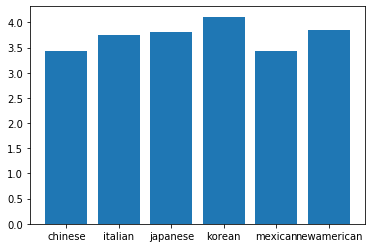

In [14]:
plt.bar(["chinese","italian","japanese","korean","mexican","newamerican"],reviews.groupby("type").mean()["rating"])

### Sentimental analysis for review text
When sharing their opintions on a certain restaurant, the Yelp user not only writes something (i.e. the review text) but also gives a rating from 1 star to 5 stars. Some people tend to write something bad but give a relative fine score while some people tend to write something good but just give a low rating. To extract the feelings or emotions in the review text, we applied sentimental analysis to assign a score to each review which represents the probability to be a positive text.

#### Library installation
`TextBlob` is a sentimental analysis Python library. It is buiut on `nltk` and has some well-trained models for direct use. We need install the library as well as its corpus.

In [ ]:
! pip install textblob

In [ ]:
! python -m textblob.download_corpora

In [15]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#### Example of `TextBlob`

In [16]:
text = reviews["text"][2]
text

'This is good place to have Chinese food in this area, clean inside and excellent service. I like their duck especially!'

In [20]:
tb = TextBlob(text, analyzer = NaiveBayesAnalyzer())

In [21]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.9459500238217358, p_neg=0.054049976178265596)

#### Applied `TextBlob` on review texts

In [22]:
# Create two new columns for the dataframe
reviews["positive_score"] = 0.0
reviews["negative_score"] = 0.0

In [ ]:
# import tqdn
# tqdn.tqdn_notebook()
for i in range(0,len(reviews)):
    t = TextBlob(reviews["text"][i], analyzer = NaiveBayesAnalyzer())
    senti = t.sentiment
    reviews["positive_score"][i] = senti.p_pos
    reviews["negative_score"][i] = senti.p_neg   

#### Result of sentimental analysis
Since it takes quite a long time to run the sentimental model on each review, we uploaded the result file to save time.

In [24]:
reviews = pd.read_csv("sentimental_scores.csv") 

In [25]:
reviews = reviews.drop(reviews.columns[0], axis=1)
reviews

,rating,restId,text,type,positive_score,negative_score
0,5.0,JJi7c7uiTzCqeWNTsldgXQ,It's been far too long since I've come here. T...,chinese,0.999998,2.370124e-06
1,5.0,JJi7c7uiTzCqeWNTsldgXQ,My husband and I decided to give this place a ...,chinese,0.696951,3.030491e-01
2,5.0,JJi7c7uiTzCqeWNTsldgXQ,This is good place to have Chinese food in thi...,chinese,0.945950,5.404998e-02
3,4.0,JJi7c7uiTzCqeWNTsldgXQ,"Oh, maybe I ordered wrong. Or this was the mos...",chinese,0.502963,4.970375e-01
4,5.0,JJi7c7uiTzCqeWNTsldgXQ,We are new to the area and got some take out f...,chinese,0.902847,9.715285e-02
...,...,...,...,...,...,...
1547,3.0,z4EIzLJlGd7gyje1Q_hKtw,Smallman Galley is one of my favorite places i...,newamerican,1.000000,3.047489e-12
1548,5.0,z4EIzLJlGd7gyje1Q_hKtw,My husband and I love federal galley. This is ...,newamerican,0.949620,5.037985e-02
1549,5.0,z4EIzLJlGd7gyje1Q_hKtw,Great lunch visit for all to this bustling foo...,newamerican,0.992826,7.174252e-03
1550,5.0,iTonKZOZWC42LlQB77JpkA,This is a great LITTLE bar/restaurant!\n\nIt i...,newamerican,0.941640,5.836005e-02


#### Mean sentimental socres for each category

In [26]:
meanByCate = reviews.groupby("type").mean()
meanByCate

,rating,positive_score,negative_score
type,,,
chinese,3.433846,0.767375,0.232625
italian,3.753351,0.864170,0.135830
japanese,3.812500,0.792091,0.207909
korean,4.114286,0.855282,0.144718
mexican,3.429630,0.735627,0.264373
newamerican,3.848614,0.806903,0.193097


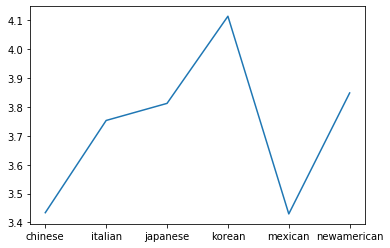

In [28]:
plt.plot(meanByCate["rating"])

<BarContainer object of 6 artists>

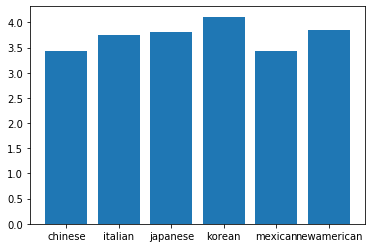

In [31]:
plt.bar(["chinese","italian","japanese","korean","mexican","newamerican"],meanByCate['rating'])

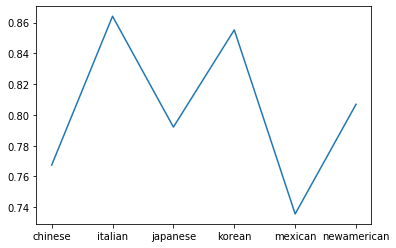

In [27]:
plt.plot(meanByCate["positive_score"])

<BarContainer object of 6 artists>

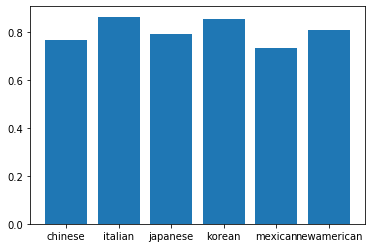

In [32]:
plt.bar(["chinese","italian","japanese","korean","mexican","newamerican"],norm['positive_score'])

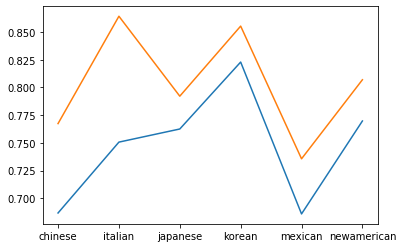

In [30]:
# Normalize the rating to range [0,1] to compare with sentimental scores directly
norm = meanByCate.copy()
norm['rating'] = norm['rating']/5
plt.plot(norm[['rating','positive_score']])

### Hypothesis testing on whether there is different standard for each category

#### Theorem and library installation

In [33]:
from scipy import stats

In [42]:
import math

#### Example on regression

In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress(reviews[reviews["type"]=="chinese"]["positive_score"],reviews[reviews["type"]=="chinese"]["rating"])

In [35]:
slope, intercept, r_value, p_value, std_err

(2.110771788123103,
 1.8140919051204252,
 0.45075406444374405,
 1.1421297151146669e-17,
 0.23258445891059815)

#### Regression

In [37]:
types = ["chinese","italian","japanese","korean","mexican","newamerican"]

In [38]:
slopes = {}
std_errs = {}
for i in range(0,len(types)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(reviews[reviews["type"]==types[i]]["positive_score"],reviews[reviews["type"]==types[i]]["rating"])
    slopes[types[i]] = slope
    std_errs[types[i]] = std_err

In [39]:
slopes

{'chinese': 2.110771788123103,
 'italian': 1.7217859374529048,
 'japanese': 1.2788598473347195,
 'korean': 1.1992683616906192,
 'mexican': 1.7668827921561852,
 'newamerican': 1.2677619068041497}

<BarContainer object of 6 artists>

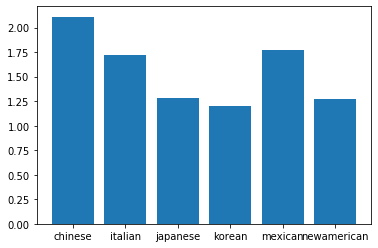

In [45]:
plt.bar(*zip(*sorted(slopes.items())))

In [40]:
std_errs

{'chinese': 0.23258445891059815,
 'italian': 0.26690109773999804,
 'japanese': 0.4588331840417963,
 'korean': 0.5420079415959076,
 'mexican': 0.21286559990583956,
 'newamerican': 0.17233371252499435}

<BarContainer object of 6 artists>

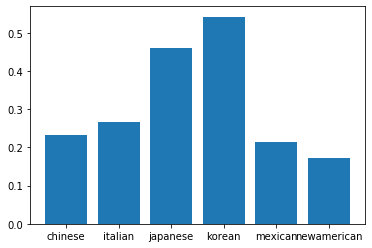

In [46]:
plt.bar(*zip(*sorted(std_errs.items())))

#### Hypothesis testing

In [43]:
zs = {}
for i in range(0,len(types)):
    for j in range(i+1,len(types)):
        z = (slopes[types[i]] - slopes[types[j]]) / math.sqrt(std_errs[types[i]]**2 + std_errs[types[j]]**2)
        rej = z > 1.65
        zs[types[i]+" & "+types[j]] = (z, rej)

In [44]:
zs

{'chinese & italian': (1.0987611444179142, False),
 'chinese & japanese': (1.6171980831638717, False),
 'chinese & korean': (1.5454358355991136, False),
 'chinese & mexican': (1.0907096432836478, False),
 'chinese & newamerican': (2.9122259428989445, True),
 'italian & japanese': (0.8344271834918732, False),
 'italian & korean': (0.8648668138680667, False),
 'italian & mexican': (-0.13209729226894856, False),
 'italian & newamerican': (1.429083883465232, False),
 'japanese & korean': (0.11207839732447912, False),
 'japanese & mexican': (-0.9648422468349488, False),
 'japanese & newamerican': (0.022642880047275417, False),
 'korean & mexican': (-0.9747641330072548, False),
 'korean & newamerican': (-0.12042915036094734, False),
 'mexican & newamerican': (1.8224021311381875, True)}

There are two pairs of testing produces the "rejection" result, which means the coefficient for Chinese and New American cuisines and the coefficient for Mexican and New American cuisines have significantly difference.

### Conclusion

We first did sentimental analysis for review text. By Naive Bayes, we got the positive score for each text and calculate the mean by each category. The rating is the actual score given by the user along with the review and the positive score is produced by the sentimental model. Then we ran the regression from positive scores to actual ratings and got the slope for each category. The higher slope means people say something not that good but still give high rating. People are more generous in this way! To see if there is any different standard when rating different categories, we did hypothesis testing on slope coefficient. The result shows people are more harsh to New American dishes than Chinese dishes and Mexican dishes! Notes that over 50% Yelp users are from US or Canada, We believe people tend to have higher standard for dishes from their own culture! 

